# A-B Comparison of two models

In this notebook, we will see how to compare two models on multiple metrics.
This is especially useful if you have a complex problem and want to see if your new model is better than the old one.
Because there are many aspects to it, one usually has to make some trade-offs.
For example, you may have to convince the manager that the longer runtime is worth the better accuracy.

For this, we have some nice plots available.

In [57]:
import pandas as pd

data_a = pd.read_csv("data_a.csv").set_index("instance_id")

data_b = pd.read_csv("data_b.csv").set_index("instance_id")

In [58]:
import random


def perturb(x: float, mean_diff: float, std_diff: float) -> float:
    return x * (1 + random.normalvariate(mean_diff, std_diff))


xs = [4, 5, 6, 5, 3, 4, 9, 6, 4, 5, 6, 11, 14, 7]
data_a = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

data_b = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.04, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, -0.05, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.03, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, -0.1, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

In [59]:
data_a

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,39.353613,41.082014,20.435475,20.452875,370.600409,77.787101
1,56.600938,45.496477,24.509637,25.833067,483.645781,103.423432
2,66.519729,56.704875,29.679451,31.899222,622.112400,121.574848
3,48.828385,50.393580,25.350327,23.900558,509.169136,96.813364
4,26.544752,29.305573,16.247092,14.650843,289.310459,62.051554
5,40.253024,42.579373,17.061784,19.877555,398.161954,82.313889
6,93.784146,99.425497,43.960761,44.553116,918.413775,180.898441
7,56.025047,59.496908,30.309655,29.093710,597.704574,135.956081
8,39.653874,37.618916,19.545518,19.580523,399.227930,80.176533
9,52.456486,49.029306,23.580340,26.193629,544.060668,99.553992


In [60]:
data_b

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,38.735652,36.491386,22.034036,17.758191,408.881146,84.441427
1,55.403082,51.038904,24.642146,18.930511,485.074317,98.982178
2,60.475988,49.423187,31.220274,26.466405,597.016918,113.606224
3,52.340796,51.900668,28.325480,21.755085,493.057722,92.474298
4,32.503853,27.856551,16.612993,13.634545,311.603082,59.355636
5,38.052942,42.861760,19.924128,17.008492,374.634171,78.330345
6,94.513328,85.801736,49.067103,44.731778,912.649110,192.225449
7,63.171138,60.839929,31.263532,25.427127,555.882986,122.705059
8,39.507765,40.829394,22.106269,17.967738,404.627215,87.754167
9,54.368534,44.694220,26.732981,20.532966,515.163279,97.438148


In [61]:
data_b.columns

Index(['mean_delivery_time_to_customer', 'max_delivery_time_to_customer',
       'mean_tour_length_for_drivers', 'max_tour_length_for_drivers',
       'revenue', 'satisfaction_score'],
      dtype='object')

In [62]:
from scatter_with_performance_zones import plot_comparison_grid

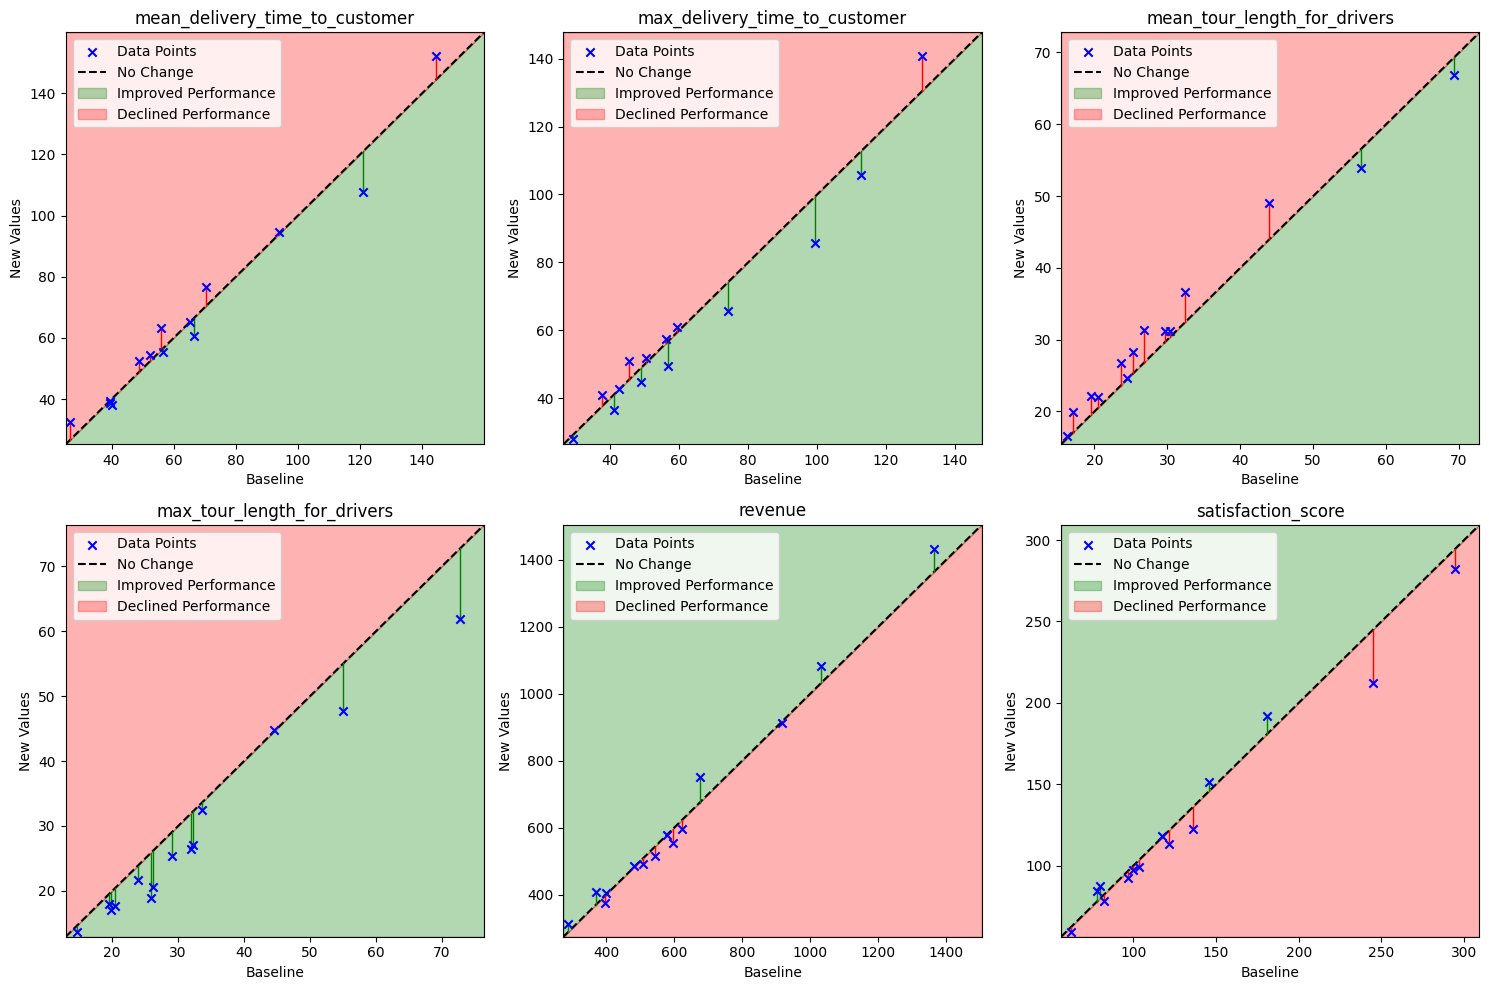

In [63]:
from matplotlib import pyplot as plt

plot_comparison_grid(
    data_a,
    data_b,
    [
        ("mean_delivery_time_to_customer", "min"),
        ("max_delivery_time_to_customer", "min"),
        ("mean_tour_length_for_drivers", "min"),
        ("max_tour_length_for_drivers", "min"),
        ("revenue", "max"),
        ("satisfaction_score", "max"),
    ],
    n_cols=3,
)
plt.show()